In [1]:
# ------------------------
# SETUP AND IMPORTS
# ------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

# ------------------------
# DATA LOADING
# ------------------------

try:
    # Load data with timestamp parsing
    df = pd.read_csv('../../data/raw_analyst_ratings.csv')
    print(f"✅ Successfully loaded data with shape {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: unable to upload file' not found")
    raise

✅ Successfully loaded data with shape (1407328, 6)


In [ ]:
# ------------------------
# VISUALIZE HEADLINE LENGHT
# ------------------------


df['headline_length'] = df['headline'].astype(str).apply(len)
print(df['headline_length'].describe())
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


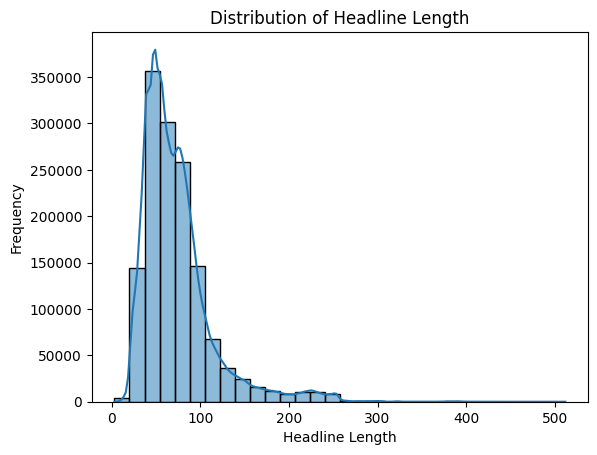

In [2]:
# ------------------------
# VISUALIZE HEADLINE LENGHT
# ------------------------


df['headline_length'] = df['headline'].astype(str).apply(len)
print(df['headline_length'].describe())
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


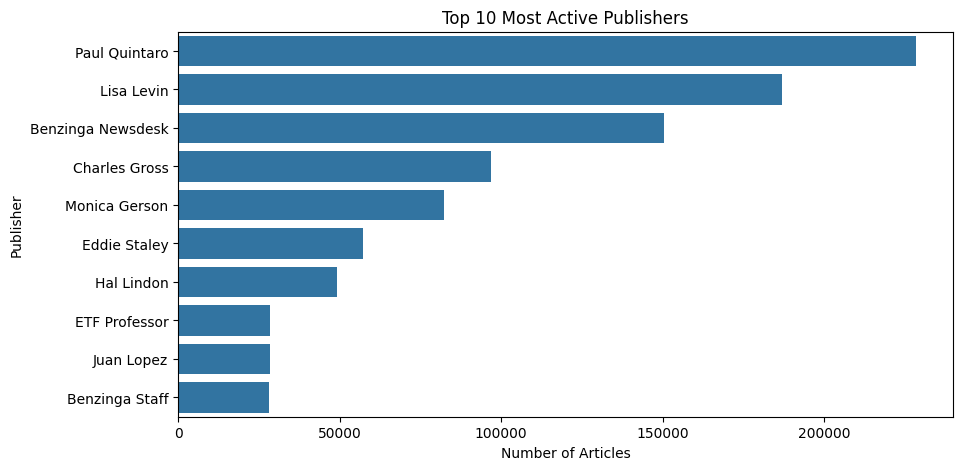

In [3]:
# ------------------------
# COUNT THE NUMBER OF 
# ARTICLES PER PUBLISHER
# ------------------------

publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))  # Top 10 publishers

# Visualize the top publishers
plt.figure(figsize=(10,5))
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


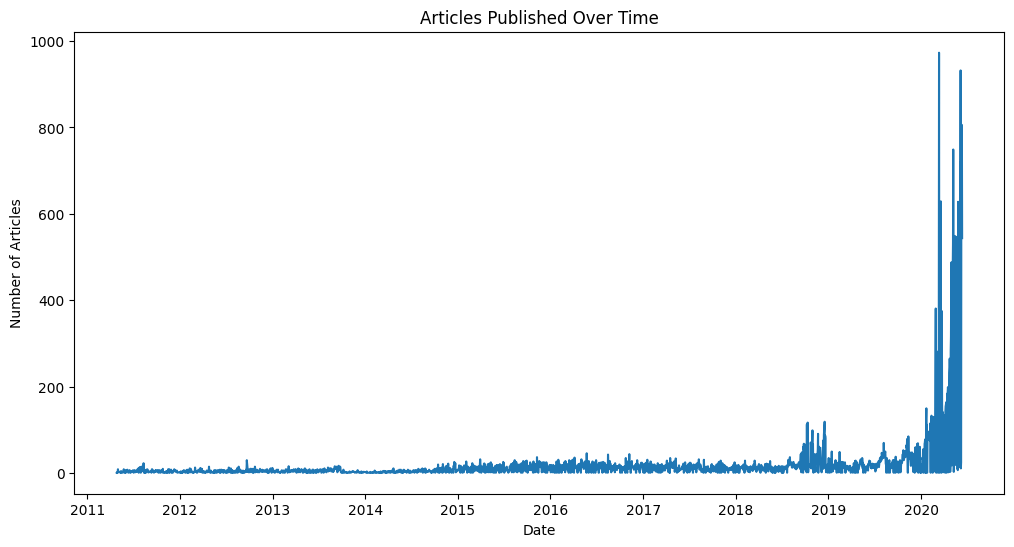

In [4]:
#-------------------------------------------------
# Analyze the publication 
# dates for trends over time
#--------------------------------------------------

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Count articles by date
articles_per_day = df.groupby(df['date'].dt.date).size()

# Plot
plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


In [5]:
#-------------------------------------------------
# TEXT ANALYSIS (TOP MODELING)
# Extract common keywords/phrases
#--------------------------------------------------

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['headline'].astype(str))

# Get top n-grams
feature_names = vectorizer.get_feature_names_out()
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

print("Top Keywords/Phrases:")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")


Top Keywords/Phrases:
vs: 162099
stocks: 161776
est: 140604
eps: 128897
market: 120558
shares: 114313
reports: 108710
update: 91723
earnings: 87399
sales: 79645


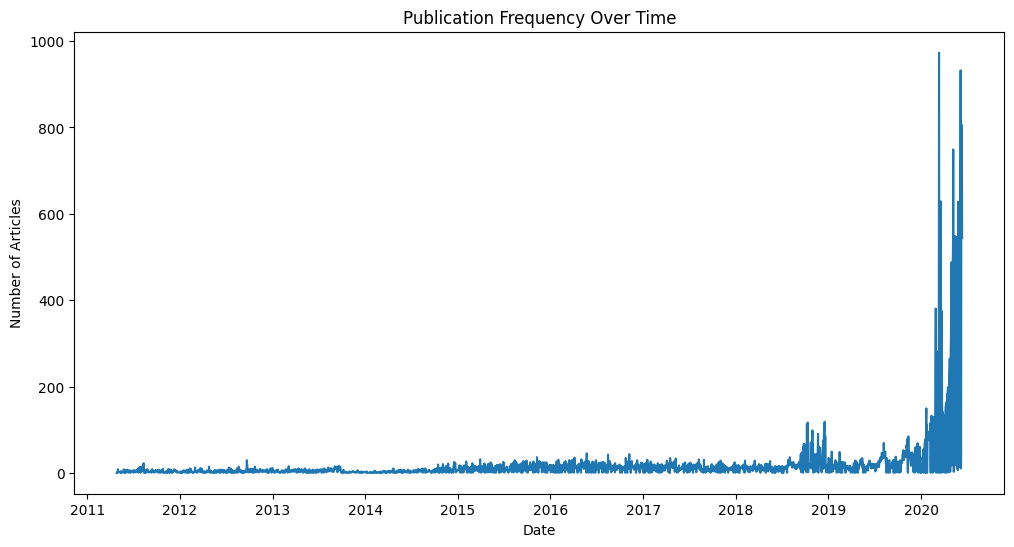

In [6]:
#-------------------------------------------------
# TIME SERIES ANALYSIS
#--------------------------------------------------

# Articles per day already calculated earlier
plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

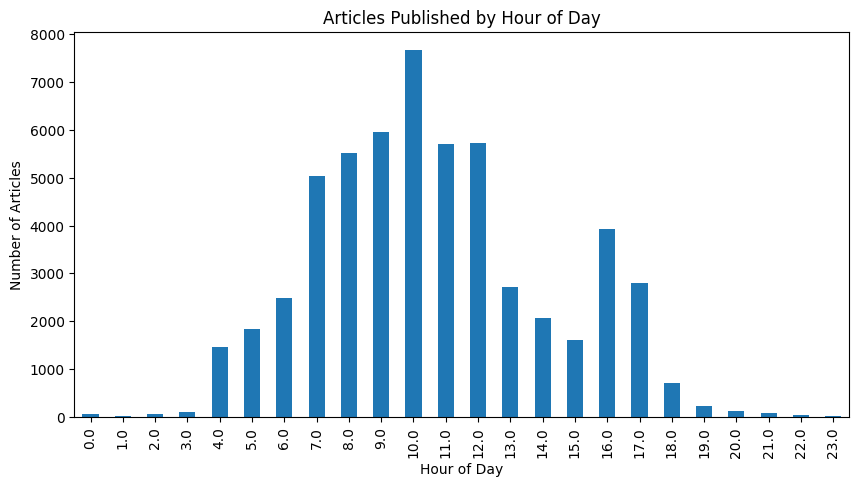

In [7]:
#-------------------------------------------------
# ANALYSE PUBLISHING TIME
#--------------------------------------------------

# Extract hour from datetime
df['hour'] = df['date'].dt.hour
articles_per_hour = df.groupby('hour').size()

plt.figure(figsize=(10,5))
articles_per_hour.plot(kind='bar')
plt.title('Articles Published by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

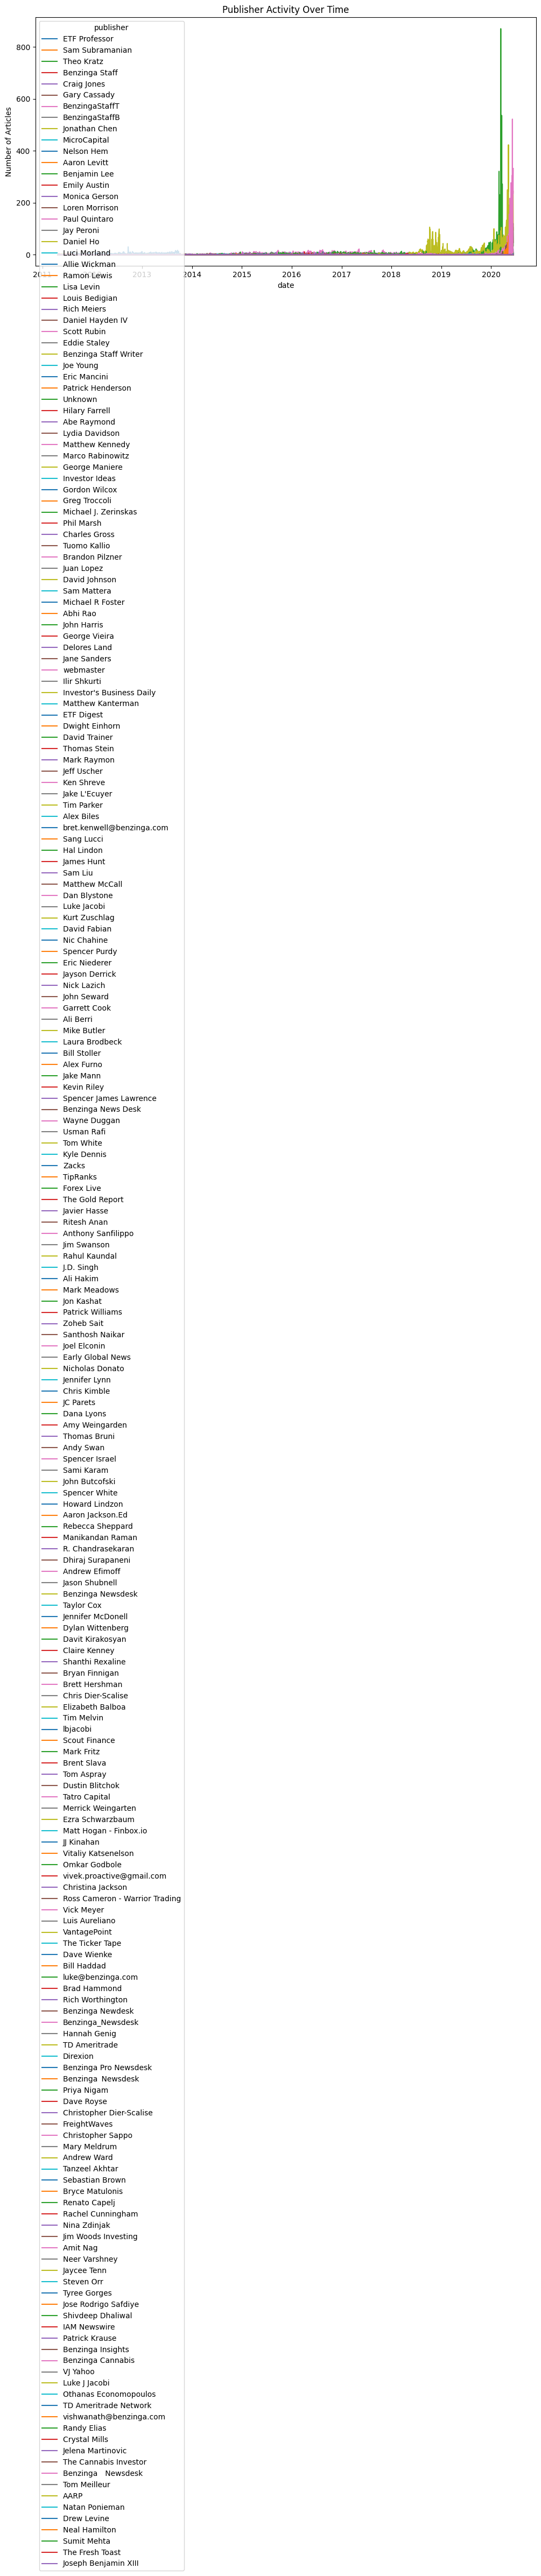

In [8]:
#-------------------------------------------------
# PUBLISHER ANALYSIS
#--------------------------------------------------

publisher_time = df.groupby([df['date'].dt.date, 'publisher']).size().unstack(fill_value=0)
publisher_time.plot(figsize=(12,6))
plt.title('Publisher Activity Over Time')
plt.ylabel('Number of Articles')
plt.show()


In [9]:
#-------------------------------------------------
# CHECK FOR EMAIL ADDRESS IN PUBLISHER
#--------------------------------------------------

# Extract domains if emails are present
def extract_domain(publisher):
    match = re.search(r'@([\w.-]+)', str(publisher))
    return match.group(1) if match else None

df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count by domain
domain_counts = df['publisher_domain'].value_counts()
print(domain_counts.head(10))


publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
